<IPython.core.display.Javascript object>


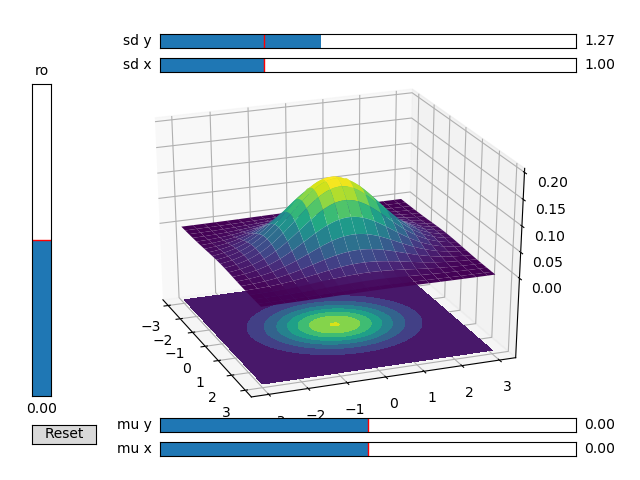

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.widgets import Slider, Button
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#saved widgets


N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)


mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0], [0,  1]])


pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y



def multivariate_gaussian(pos, mu, Sigma):
    
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mu, Sigma)

fig = plt.figure()

ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

axamp = plt.axes([0.25, 0.05, 0.65, 0.03])
axmy = plt.axes([0.25, 0.1, 0.65, 0.03])
axsd_x = plt.axes([0.25, 0.85, 0.65, 0.03])
axsd_y = plt.axes([0.25, 0.9, 0.65, 0.03])
ax_ro = plt.axes([0.05, 0.175, 0.03, 0.65])
mx = 0
my = 0
sdx = 1
sdy = 1
ro = 0

smx = Slider(axamp, 'mu x', -2.5, 2.5, valinit = mx)
smy = Slider(axmy, 'mu y', -2.5, 2.5, valinit = my)
ssd_x = Slider(axsd_x, 'sd x', 0.5, 2.5, valinit = sdx)
ssd_y = Slider(axsd_y, 'sd y', 0.5, 2.5, valinit = sdy)
s_ro = Slider(ax_ro, 'ro', -1, 1, valinit = ro, orientation='vertical')
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

def update_mantis(val):
    my = smy.val
    mx = smx.val
    sd_x = ssd_x.val
    sd_y = ssd_y.val
    ro = s_ro.val
    Sigma = np.array([[ sd_x , ro*sd_x*sd_y], [ro*sd_x*sd_y,  sd_y]])
    Z = multivariate_gaussian(pos, np.array([mx, my]), Sigma)
    ax.clear()
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
    ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)
    ax.set_zlim(-0.15,0.2)
    ax.set_zticks(np.linspace(0,0.2,5))
    
    
   
    
    fig.canvas.draw_idle()

smy.on_changed(update_mantis)
smx.on_changed(update_mantis)
ssd_x.on_changed(update_mantis)
ssd_y.on_changed(update_mantis)
s_ro.on_changed(update_mantis)

resetax = plt.axes([0.05, 0.075, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    smy.reset()
    smx.reset()
    ssd_x.reset()
    ssd_y.reset()
    s_ro.reset()
button.on_clicked(reset)

ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()